In [1]:
import numpy as np
import matplotlib.pylab as plt

## Let's do the Birthday Problem

This was the formula from the initial video. 

$$ P(\text{no overlap}) = \frac{365}{365} \times \frac{364}{365} \times ... \times \frac{365 - n + 1}{365}$$ 

We can use this to calculate.

$$ P(\text{same}) = 1 - P(\text{no overlap})$$

If you'd like to see more information, consider checking out the [wikipedia page](https://en.wikipedia.org/wiki/Birthday_paradox).

## Let's Code 

We'll have one function to calculate the probability analytically and another one to check the result via simulation.

In [2]:
def calculate(room = 20):
    return 1 - np.prod((365 - np.arange(room))/365)

In [3]:
def simulate(room = 20, n_sim = 1000):
    hit = 0 
    for i in range(n_sim):
        n_bday = np.unique(np.random.randint(1, 365, room)).shape[0]
        hit += n_bday == room
    return 1 - hit/n_sim

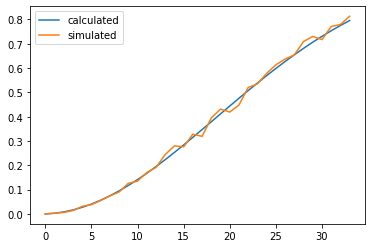

In [4]:
plt.plot([calculate(r) for r in range(1, 35)], label="calculated")
plt.plot([simulate(r) for r in range(1, 35)], label="simulated")
plt.legend();

## Towards Data 

Let's now have a look at the birthday dataset. We'll use this to redo the simulation.

In [5]:
import pandas as pd

In [8]:
df = pd.read_csv("../../data/birthdays.csv")

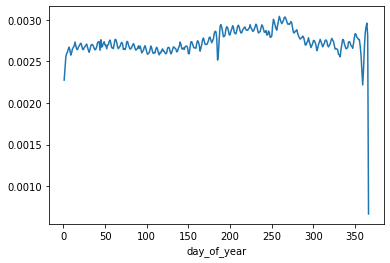

In [9]:
plot_df = (df
  .assign(date = lambda d: pd.to_datetime(d['date']))
  .assign(day_of_year = lambda d: d['date'].dt.dayofyear)
  .groupby('day_of_year')
  .agg(n_births=('births', 'sum'))
  .assign(p = lambda d: d['n_births']/d['n_births'].sum()))

probabilities = plot_df['p']
probabilities.plot();

## Towards Real Simulations 

We have seen the chart of what the distribution looks like. Let's now use that to sample!

In [10]:
def sim_real_once(room = 20):
    r = np.random.choice(probabilities.index, p=probabilities, size=room)
    return np.unique(r).shape[0] != room

def simulate_real(room = 20, n_sim = 1000):
    return np.mean([sim_real_once(room) for _ in range(n_sim)])

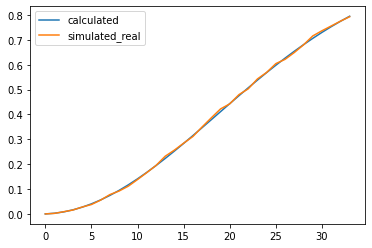

In [11]:
plt.plot([calculate(r) for r in range(1, 35)], label="calculated")
plt.plot([simulate_real(room = i, n_sim=10_000) for i in range(1, 35)], label="simulated_real")
plt.legend();

## Strange

There's barely any difference! Why? 

Let's look at the accurate distribution again and let's compare it with the inaccurate assumption.

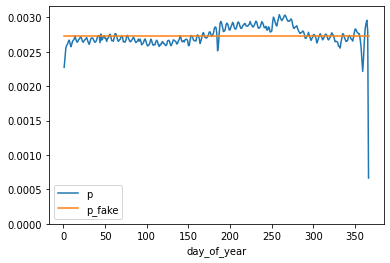

In [12]:
plot_df.assign(p_fake = lambda d: 1/d.shape[0])[['p', 'p_fake']].plot()
plt.ylim(0);

It's not *that* different now that I look at it. 

**Bonus: Entropy** 

Warning. This is a highly theoretical argument. 

Entropy is a measure for "randomness". It comes from information theory. It is defined by; 

$$ \text{entropy} = -\sum_i p_i \log(p_i)$$ 

Let's see how random these two distributions are.

In [13]:
true_p = plot_df['p']
fake_p = plot_df.assign(p_fake = lambda d: 1/d.shape[0])['p_fake']

print(f"entropy of true prob: {np.sum(true_p * np.log(true_p))}")
print(f"entropy of fake prob: {np.sum(fake_p * np.log(fake_p))}")

entropy of true prob: -5.900547300511186
entropy of fake prob: -5.902633333401367


The entropy is barely different. This doesn't suprise me too much now.

## Conclusion 

Even though the analytical solution uses assumptions that aren't true, the difference with reality isn't big enough to change the conclusions that come out of it.